In [10]:
from tensorflow.examples.tutorials.mnist import input_data
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import np_utils

import tensorflow as tf
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Label :  3


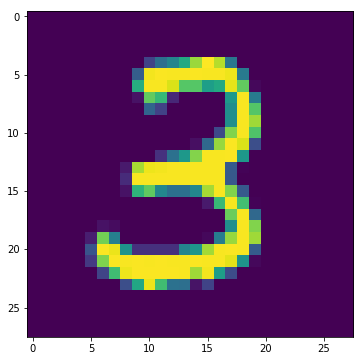

In [32]:
print("Label : ", np.where(mnist.train.labels[11] == 1)[0][0])
plt.figure(figsize=(8, 6))
plt.imshow(mnist.train.images[11].reshape(28, 28))

## Softmax regression (Perceptron)

In [7]:
%%time

x = tf.placeholder(tf.float32, [None, 784])        # Х (?, 784) , ? - batch size

W = tf.Variable(tf.zeros([784, 10]))               # Weights(784, 10) 
b = tf.Variable(tf.zeros([10]))                    # Bayes(10,)

y = tf.nn.softmax(tf.matmul(x, W) + b)             # Y_pred = W * X + b

y_ = tf.placeholder(tf.float32, ([None, 10]))      # Y_train(?, 10), ? - batch size

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])) # Cost Function = sum(real*log(pred))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Точність : {}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

Точність : 0.9175000190734863
Wall time: 3.48 s


## Neural Network(2 layers)

In [9]:
%%time

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, ([None, 10]))

W_relu = tf.Variable(tf.truncated_normal([784, 100], stddev=0.1))
b_relu = tf.Variable(tf.truncated_normal([100], stddev=0.1))

h = tf.nn.relu(tf.matmul(x, W_relu) + b_relu)

keep_probability = tf.placeholder(tf.float32)
h_drop = tf.nn.dropout(h, keep_probability)

W = tf.Variable(tf.zeros([100, 10]))
b = tf.Variable(tf.zeros([10]))

logit = tf.matmul(h_drop, W) + b

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_probability: 0.5})
      

correct_prediction = tf.equal(tf.argmax(logit, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Точність : {}'.format(sess.run(accuracy, 
                                      feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_probability: 1.})))

Точність : 0.9743000268936157
Wall time: 38.4 s


## Keras

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [14]:
# перетворили Y в [1, 0,.., 0]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# перетворили X в [?, 784] і нормалізували 
X_train = x_train.reshape([-1, 28*28]) / 255.
X_test = x_test.reshape([-1, 28*28]) / 255.

In [19]:
def create_model(init):
    model = Sequential()
    model.add(Dense(100, input_shape=(28*28,), init=init, activation='tanh'))
    model.add(Dense(100, init=init, activation='tanh'))
    model.add(Dense(100, init=init, activation='tanh'))
    model.add(Dense(100, init=init, activation='tanh'))
    model.add(Dense(10, init=init, activation='softmax'))
    return model

In [20]:
uniform_model = create_model('uniform')
uniform_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
uniform_model.fit(X_train, Y_train, batch_size=64, nb_epoch=30, verbose=1, validation_data=(X_test, Y_test))

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_shape=(784,), kernel_initializer="uniform", activation="tanh")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, kernel_initializer="uniform", activation="tanh")`
  after removing the cwd from sys.path.
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, kernel_initializer="uniform", activation="tanh")`
  """
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, kernel_initializer="uniform", activati

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 146us/step - loss: 2.3005 - acc: 0.1122 - val_loss: 2.2986 - val_acc: 0.1135
Epoch 2/30
60000/60000 [==============================] - 8s 135us/step - loss: 2.2965 - acc: 0.1124 - val_loss: 2.2928 - val_acc: 0.1135
Epoch 3/30
60000/60000 [==============================] - 8s 138us/step - loss: 2.2773 - acc: 0.1544 - val_loss: 2.2208 - val_acc: 0.2113
Epoch 4/30
60000/60000 [==============================] - 8s 132us/step - loss: 1.9185 - acc: 0.2627 - val_loss: 1.6246 - val_acc: 0.4029
Epoch 5/30
60000/60000 [==============================] - 9s 145us/step - loss: 1.2360 - acc: 0.5756 - val_loss: 0.9250 - val_acc: 0.6884
Epoch 6/30
60000/60000 [==============================] - 8s 135us/step - loss: 0.7649 - acc: 0.7620 - val_loss: 0.6305 - val_acc: 0.8185
Epoch 7/30
60000/60000 [==============================] - 9s 152us/step - loss: 0.5765 - acc: 0.8361 - val_loss: 0.5049 - 

In [23]:
# для симетричних функцій активації(tanh) - ініціалізація ваг по методу Ксавьє (glorot_normal, glorot_uniform)
# для несиметричних(RelU) - ініціалізація ваг по методу Хе(he_normal, he_uniform)
glorot_model = create_model('glorot_normal')
glorot_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
glorot_model.fit(X_train, Y_train, batch_size=64, nb_epoch=30, verbose=1, validation_data=(X_test, Y_test))

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_shape=(784,), kernel_initializer="glorot_normal", activation="tanh")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, kernel_initializer="glorot_normal", activation="tanh")`
  after removing the cwd from sys.path.
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, kernel_initializer="glorot_normal", activation="tanh")`
  """
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, kernel_initializer="

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 152us/step - loss: 0.7558 - acc: 0.8164 - val_loss: 0.3846 - val_acc: 0.8990
Epoch 2/30
60000/60000 [==============================] - 9s 150us/step - loss: 0.3461 - acc: 0.9042 - val_loss: 0.3026 - val_acc: 0.9165
Epoch 3/30
60000/60000 [==============================] - 9s 147us/step - loss: 0.2903 - acc: 0.9167 - val_loss: 0.2655 - val_acc: 0.9254
Epoch 4/30
60000/60000 [==============================] - 9s 144us/step - loss: 0.2595 - acc: 0.9249 - val_loss: 0.2472 - val_acc: 0.9320
Epoch 5/30
60000/60000 [==============================] - 9s 148us/step - loss: 0.2359 - acc: 0.9319 - val_loss: 0.2232 - val_acc: 0.9352
Epoch 6/30
60000/60000 [==============================] - 9s 153us/step - loss: 0.2159 - acc: 0.9378 - val_loss: 0.2069 - val_acc: 0.9397
Epoch 7/30
60000/60000 [==============================] - 10s 159us/step - loss: 0.1988 - acc: 0.9426 - val_loss: 0.1915 -

## Mini-batch Normalization

In [36]:
def fully_connected_layer(tensor, input_size, out_size):
    W = tf.Variable(tf.truncated_normal([input_size, out_size], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_size], stddev=0.1))
    return tf.nn.tanh(tf.matmul(tensor, W) + b)

def batchnorm_layer(tensor, size):
    batch_mean, batch_var = tf.nn.moments(tensor, [0])
    beta = tf.Variable(tf.zeros([size]))
    scale = tf.Variable(tf.ones([size]))
    return tf.nn.batch_normalization(tensor, batch_mean, batch_var, beta, scale, 0.001)

In [25]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [43]:
%%time

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

h1 = fully_connected_layer(x, 784, 100)
h1_bn = batchnorm_layer(h1, 100)

h2 = fully_connected_layer(h1_bn, 100, 100)
y_logit = fully_connected_layer(h2, 100, 10)

loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y_)
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)


init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_op, feed_dict={x: batch_xs, y_: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y_logit, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Точність : {}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

Точність : 0.9772999882698059
Wall time: 44 s


## Mini-batch normalization + AdamOptimizer

In [44]:
%%time

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

h1 = fully_connected_layer(x, 784, 100)
h1_bn = batchnorm_layer(h1, 100)

h2 = fully_connected_layer(h1_bn, 100, 100)
y_logit = fully_connected_layer(h2, 100, 10)

loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y_)
train_adam_op = tf.train.AdamOptimizer().minimize(loss)


init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_adam_op, feed_dict={x: batch_xs, y_: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y_logit, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Точність : {}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

Точність : 0.9779000282287598
Wall time: 49.2 s


## Mini-batch normalization + AdamOptimizer + Xavier Initialization

In [55]:
%%time


x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

W_l1 = tf.get_variable(name='W_l1', shape=[784, 100], initializer=tf.contrib.layers.xavier_initializer())
b_l1 = tf.get_variable(name='b_l1', shape=[100], initializer=tf.contrib.layers.xavier_initializer())
h1 = tf.nn.tanh(tf.matmul(x, W_l1) + b_l1)

h1_bn = batchnorm_layer(h1, 100)

W_l2 = tf.get_variable(name='W_l2', shape=[100, 100], initializer=tf.contrib.layers.xavier_initializer())
b_l2 = tf.get_variable(name='b_l2', shape=[100], initializer=tf.contrib.layers.xavier_initializer())
h2 = tf.nn.tanh(tf.matmul(h1_bn, W_l2) + b_l2)

W_l3 = tf.get_variable(name='W_l3', shape=[100, 10], initializer=tf.contrib.layers.xavier_initializer())
b_l3 = tf.get_variable(name='b_l3', shape=[10], initializer=tf.contrib.layers.xavier_initializer())

y_logit = tf.nn.tanh(tf.matmul(h2, W_l3) + b_l3)

loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y_)
train_adam_op = tf.train.AdamOptimizer().minimize(loss)


init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_adam_op, feed_dict={x: batch_xs, y_: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y_logit, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Точність : {}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

Точність : 0.9793000221252441
Wall time: 1min 3s
